# Mục đích:
* Dự đoán liệu thu nhập hàng năm của một người trưởng thành lớn hơn hay nhỏ hơn $50k một năm hay không?
* Sự bất bình đẳng về tài sản và thu nhập là một mối quan tâm sâu sắc của các chính phủ đặc biệt là ở các quốc gia đang phát triển như Mĩ và Châu Âu. Nguyên tắc phổ quát trong bình đẳng thu nhập đảm bảo phát triển bền vững và cải thiện sự ổn định kinh tế của một quốc gia. Việc áp dụng các kỹ thuật học máy và khai thác dữ liệu trong cung cấp giải pháp cho vấn đề bình đẳng thu nhập là khả thi và nhiều triển vọng

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('income_evaluation.csv')

#remove all the spaces from the column names
df.columns = list(map(lambda a: a.lstrip(), df.columns))

#drop useless values
df.drop(["fnlwgt"],axis=1,inplace=True)

df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Understanding the Data

In [4]:
df.shape

(32561, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


Bộ dữ liệu có 32561 quan sát và 15 biến. Trong đó có 7 biến numerical và 9 biến categorical

In [6]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

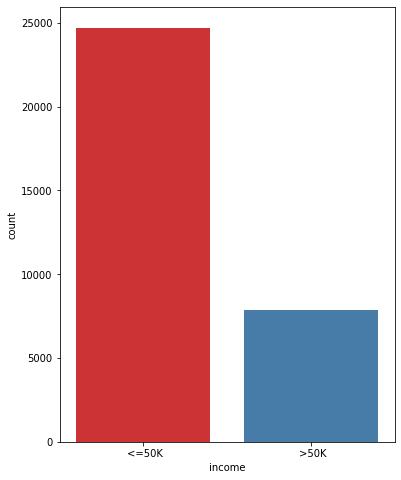

In [7]:
f,ax = plt.subplots(figsize=(6,8))
ax = sns.countplot(x='income', data=df, palette='Set1')
plt.show()

In [8]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


##Visualization

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

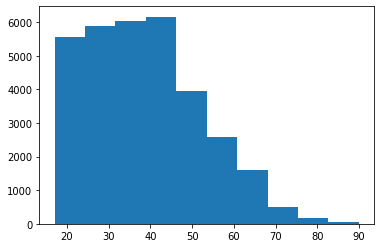

In [9]:
plt.hist(df['age'])

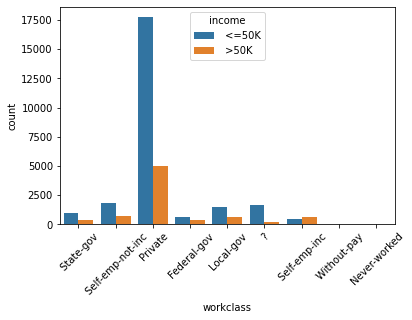

In [10]:
#work_type vs target_incom
sns.countplot(x = 'workclass', hue = 'income', data = df)
plt.xticks(rotation=45);

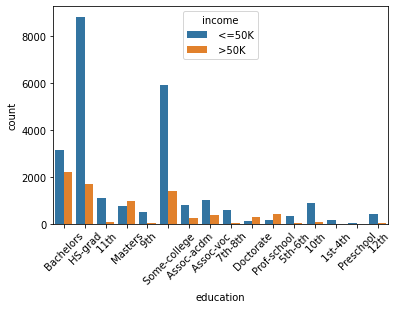

In [11]:
#education vs target_incom
sns.countplot(x = 'education', hue = 'income', data = df)
plt.xticks(rotation=45);

In [12]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

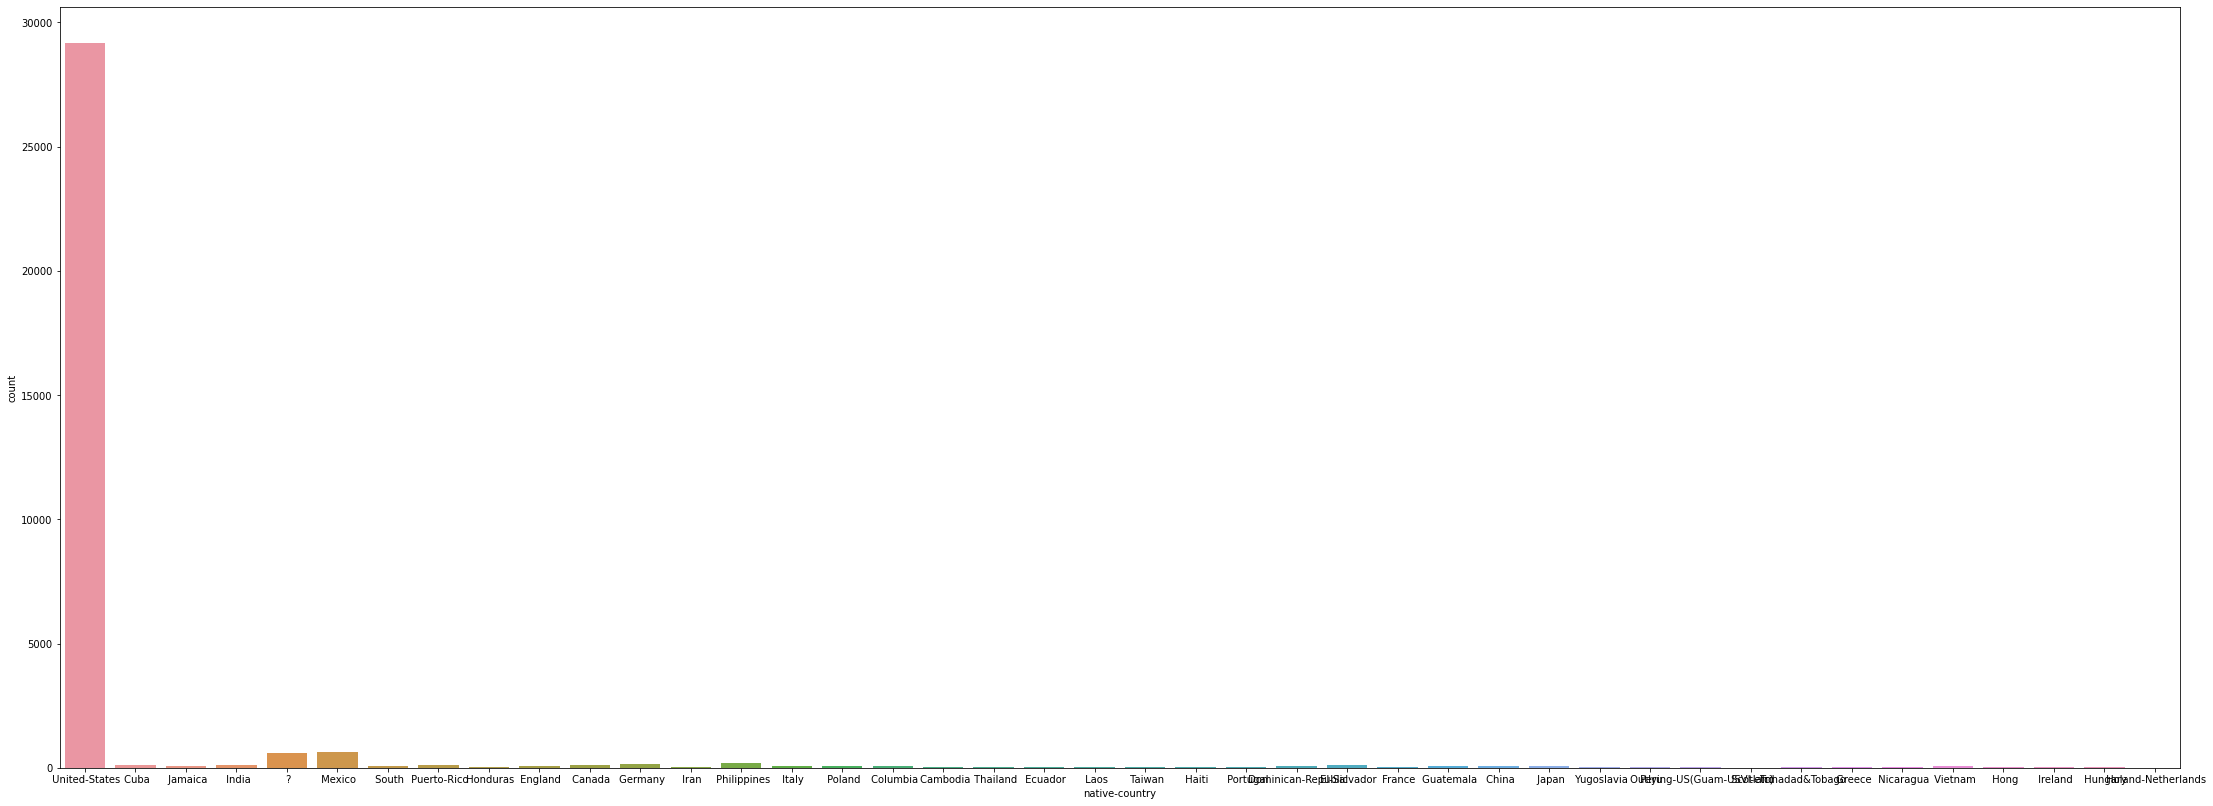

In [13]:
#explore which country do most people belong
plt.figure(figsize=(38,14))
sns.countplot(x='native-country',data= df)
plt.show()

Các quan sát từ `United-States` khá nhiều nên chúng ta có thể gộp các nước khác thành `Other`

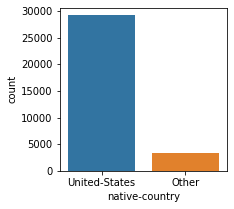

In [14]:
df['native-country'] = df['native-country'].str.strip()

df.loc[df['native-country']!='United-States','native-country'] = 'Other'

plt.figure(figsize=(3,3))
sns.countplot(x='native-country',data=df)
plt.show()

In [15]:
from pandas_profiling import ProfileReport

In [16]:
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
df.drop_duplicates()
df.to_csv('income_pre.csv',index=False)